## Project: Logistic Regression
By : Aaminah Arif - 100061200 and Sahlah Adesina - 100061415

#### Tasks:
1. Explain the Model
2. Description of the Data
3. Arrange Data
4. Training: Python + Gradient Descent

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Task 1: Explain the Model

#### Task 2: Description of the Data

In [132]:
# Reading the data as a dataframe
quality_df = pd.read_excel('Data_Model_IoTMLCQ_2024.xlsx')
quality_df.head()

,Datetime,Month,Average Fish Weight (g),Survival Rate (%),Disease Occurrence (Cases),Temperature (°C),Dissolved Oxygen (mg/L),pH,Turbidity (NTU),Month_Num,...,day,hour,oxigeno_scaled,ph,turbidez,Oxygenation Automatic,Corrective Measures,Thermal Risk Index,Low Oxygen Alert,Health Status
0,2024-01-01 00:00:00,January,275.82,95.27,2.0,27.47,6.34,7.98,3.3,1.0,...,1.0,0.0,8.355273,0.387898,0.020505,Yes,No,Normal,Safe,Stable
1,2024-01-01 01:00:00,January,275.82,95.27,2.0,27.47,6.34,7.98,3.3,1.0,...,1.0,1.0,8.256397,0.343950,0.108561,No,No,Normal,Safe,Stable
2,2024-01-01 02:00:00,January,275.82,95.27,2.0,27.47,6.34,7.98,3.3,1.0,...,1.0,2.0,8.511549,0.365285,0.410457,Yes,No,Normal,Safe,Stable
3,2024-01-01 03:00:00,January,275.82,95.27,2.0,27.47,6.34,7.98,3.3,1.0,...,1.0,3.0,8.362301,0.189601,0.891217,No,No,Normal,Safe,Stable
4,2024-01-01 04:00:00,January,275.82,95.27,2.0,27.47,6.34,7.98,3.3,1.0,...,1.0,4.0,8.003350,0.318775,0.936614,Yes,No,Normal,Safe,Stable


In [133]:
# Checking if data has null values
quality_df.isnull()

,Datetime,Month,Average Fish Weight (g),Survival Rate (%),Disease Occurrence (Cases),Temperature (°C),Dissolved Oxygen (mg/L),pH,Turbidity (NTU),Month_Num,...,day,hour,oxigeno_scaled,ph,turbidez,Oxygenation Automatic,Corrective Measures,Thermal Risk Index,Low Oxygen Alert,Health Status
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4378,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4379,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4380,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4381,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


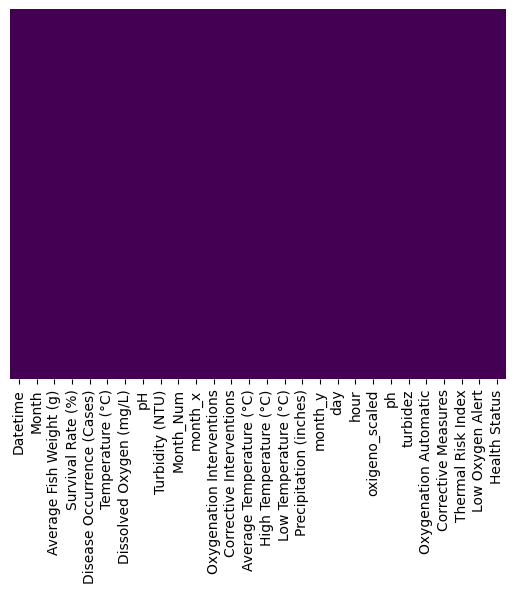

In [134]:
# Plotting the null values using a heatmap
sns.heatmap(quality_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [135]:
# Summary of the information, checking our datatypes 
quality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Datetime                    4383 non-null   datetime64[ns]
 1   Month                       4383 non-null   object        
 2   Average Fish Weight (g)     4383 non-null   float64       
 3   Survival Rate (%)           4383 non-null   float64       
 4   Disease Occurrence (Cases)  4383 non-null   float64       
 5   Temperature (°C)            4383 non-null   float64       
 6   Dissolved Oxygen (mg/L)     4383 non-null   float64       
 7   pH                          4383 non-null   float64       
 8   Turbidity (NTU)             4383 non-null   float64       
 9   Month_Num                   4383 non-null   float64       
 10  month_x                     4383 non-null   float64       
 11  Oxygenation Interventions   4383 non-null   int64       

In [136]:
#sns.pairplot(quality_df.drop(['Datetime'], axis=1), height=2)
                             

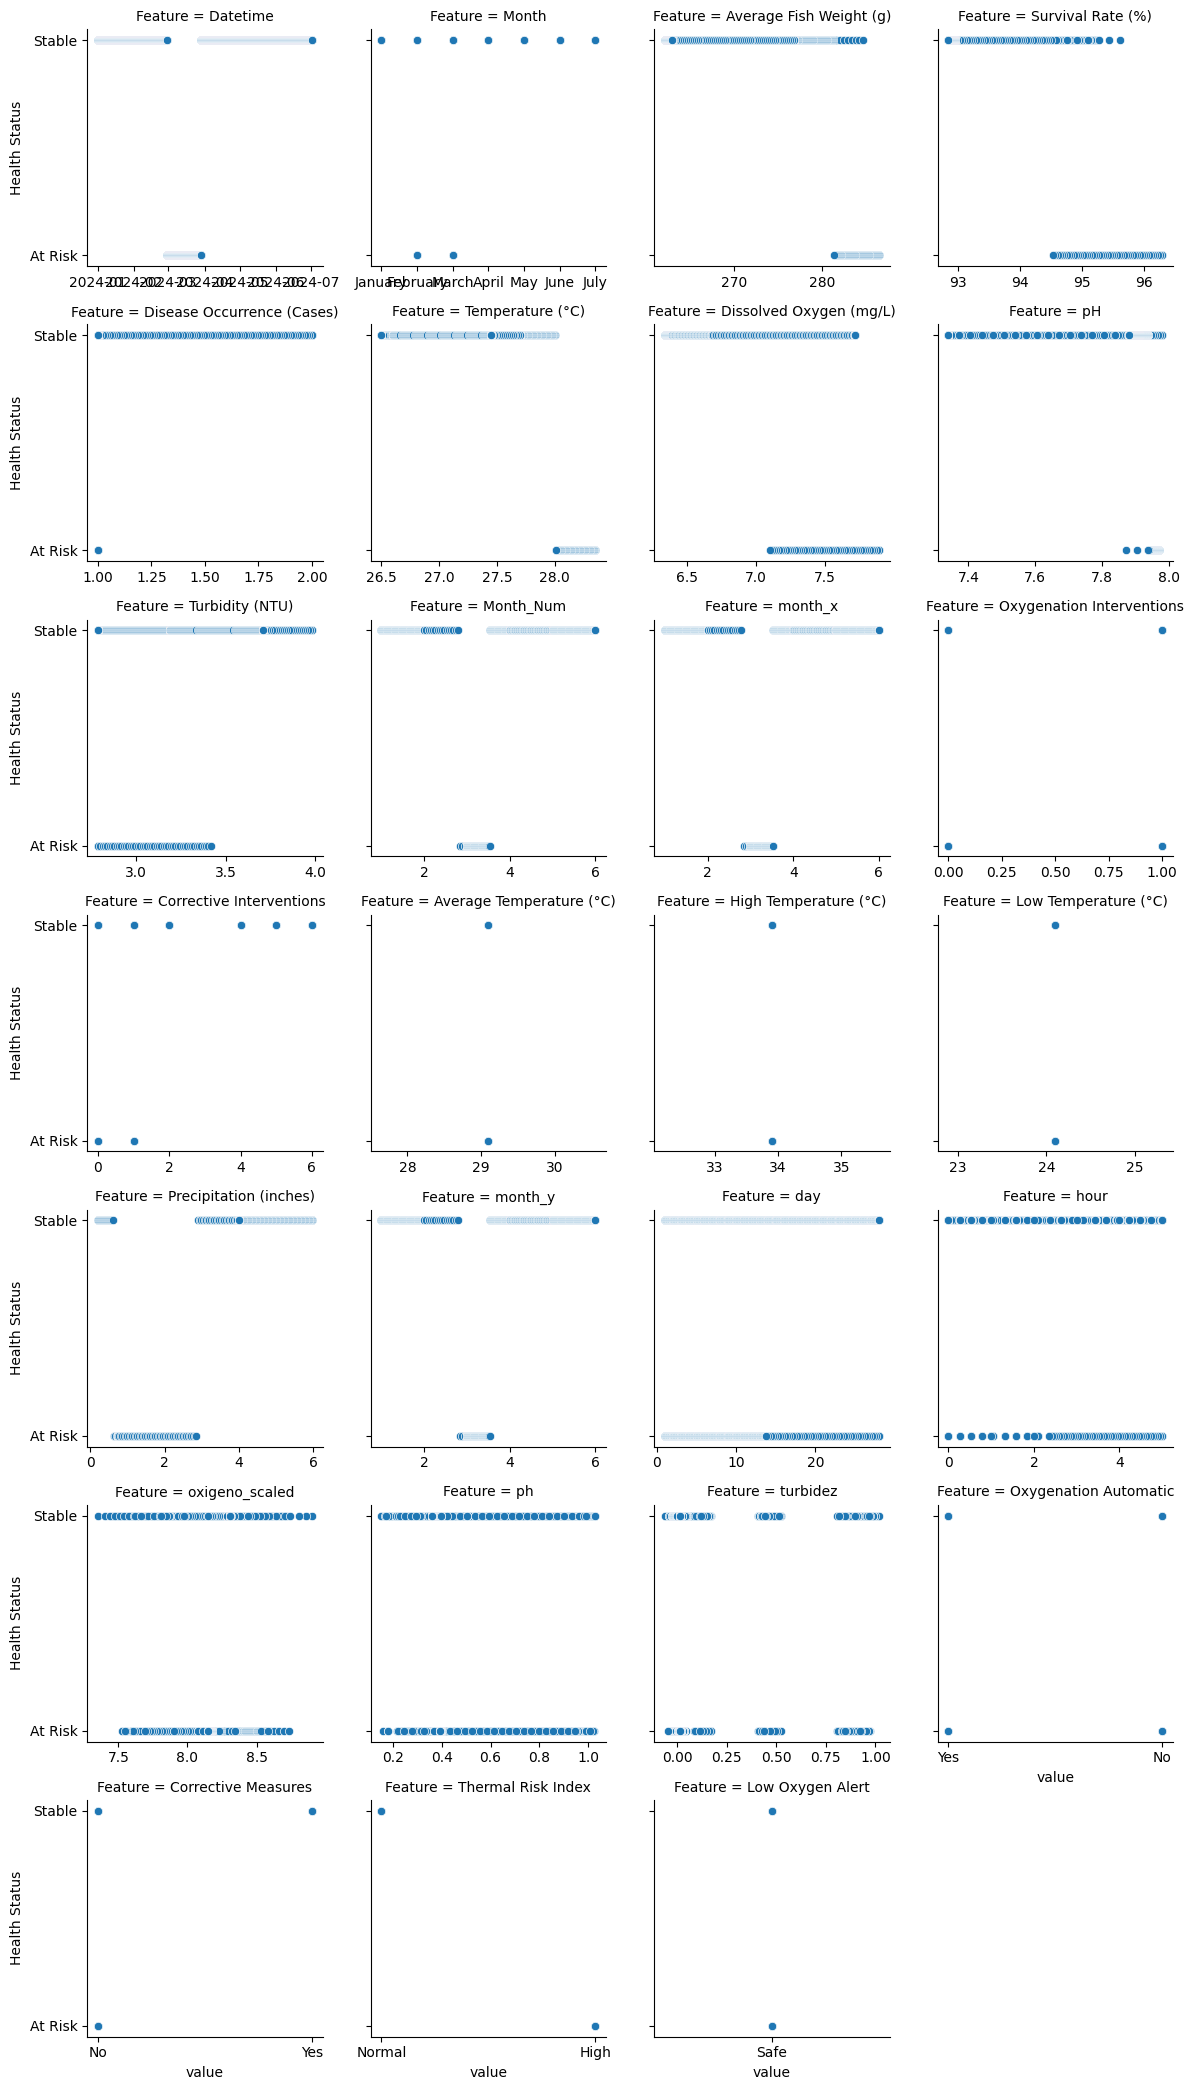

In [137]:
import seaborn as sns

dfm = quality_df.melt(id_vars='Health Status', value_vars=quality_df.columns[:-1], var_name='Feature')

p = sns.relplot(kind='scatter', data=dfm, x='value', y='Health Status', height=3,
                col='Feature', col_wrap=4, facet_kws={'sharex': False})

#### Task 3: Arrange the Data

In [138]:
# Check for features that are not numerical

categorical = [var for var in quality_df.columns if quality_df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 6 categorical variables

The categorical variables are : ['Month', 'Oxygenation Automatic', 'Corrective Measures', 'Thermal Risk Index', 'Low Oxygen Alert', 'Health Status']


In [139]:
quality_df[categorical].head()


,Month,Oxygenation Automatic,Corrective Measures,Thermal Risk Index,Low Oxygen Alert,Health Status
0,January,Yes,No,Normal,Safe,Stable
1,January,No,No,Normal,Safe,Stable
2,January,Yes,No,Normal,Safe,Stable
3,January,No,No,Normal,Safe,Stable
4,January,Yes,No,Normal,Safe,Stable


#### Summary of the categorical variables
Health Status:  
Month:  
Oxygenation Automatic:  
Corrective Measures:  
Thermal Risk Index:  
Low Oxygen Alert:  	
Health Status:  

In [140]:
# The health status column consists of either a status of "Stable" or "At Risk"
# The Stable category is stored as 1
# The At Risk category is stored as 0

health_status = []
for x in quality_df['Health Status']:
    if x == "Stable":
        health_status.append(1)
    elif x == "At Risk":
        health_status.append(0)
quality_df['Health Status'] = health_status

#### Converting Non-numeric values to integer values
The dataset contains several non-numeric columns that need to be transformed into a numerical format for machine learning models. Below is an explanation of how each column is processed.

1. **Health Status (Target Variable)**: We convert it into a binary classification:
    - Stable → 1 (Healthy)
    - At Risk → 0 (Unhealthy)

2. **Oxygenation Automatic**: This column contains Yes/No values. The new column Oxygenation_Automatic represents:
    - Yes → 1 
    - No → 0 (implicitly dropped)

3. **Corrective Measures**: This column contains Yes/No values. We apply one-hot encoding, keeping only one column The new column Corrective_Measures represents:
    - Yes → 1 
    - No → 0 (implicitly dropped)

4. **Thermal Risk Index**: This column contains categorical values, e.g., Normal, High, Low. We apply one-hot encoding, dropping the first category (Low).The remaining column Thermal_Risk_Index captures:
    - Normal → 1
    - High → 0 (implicitly dropped)

5. **Low Oxygen Alert**:This column contains Safe/Alert values.The new column Low_Oxygen_Alert represents:
    - Safe → 1
    - Alert → 0






In [141]:
# Converting the original Oxygenation Automatic column to boolean values
pd.get_dummies(quality_df['Oxygenation Automatic'])

,No,Yes
0,False,True
1,True,False
2,False,True
3,True,False
4,False,True
...,...,...
4378,False,True
4379,True,False
4380,False,True
4381,True,False


In [142]:
# Renaming the column and dropping the column named "No"
oxygenation_automatic = pd.get_dummies(quality_df['Oxygenation Automatic'], drop_first=True)
oxygenation_automatic.rename(columns = {"Yes":"Oxygenation_Automatic"},inplace=True)
oxygenation_automatic.head()

,Oxygenation_Automatic
0,True
1,False
2,True
3,False
4,True


In [143]:
# Converting the original Corrective Measures column to boolean values
pd.get_dummies(quality_df['Corrective Measures'])

,No,Yes
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False
...,...,...
4378,True,False
4379,True,False
4380,True,False
4381,True,False


In [144]:
# Renaming the column and dropping the column named "No"
corrective_measures = pd.get_dummies(quality_df['Corrective Measures'], drop_first=True)
corrective_measures.rename(columns = {"Yes":"Corrective_Measures"},inplace=True)
corrective_measures.head()

,Corrective_Measures
0,False
1,False
2,False
3,False
4,False


In [145]:
# Converting the original Thermal Risk Index column to boolean values
pd.get_dummies(quality_df['Thermal Risk Index'])

,High,Normal
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
4378,False,True
4379,False,True
4380,False,True
4381,False,True


In [146]:
# Renaming the column and dropping the column named "No"
thermal_risk_index = pd.get_dummies(quality_df['Thermal Risk Index'], drop_first=True)
thermal_risk_index.rename(columns = {"Normal":"Thermal_Risk_Index"},inplace=True)
thermal_risk_index.head()

,Thermal_Risk_Index
0,True
1,True
2,True
3,True
4,True


In [147]:
# Converting the original Low Oxygen Alert column to boolean values
low_oxygen_alert = pd.get_dummies(quality_df['Low Oxygen Alert'])
low_oxygen_alert

,Safe
0,True
1,True
2,True
3,True
4,True
...,...
4378,True
4379,True
4380,True
4381,True


In [148]:
# Renaming the column
low_oxygen_alert.rename(columns = {"Safe":"Low_Oxygen_Alert"},inplace=True)
low_oxygen_alert


,Low_Oxygen_Alert
0,True
1,True
2,True
3,True
4,True
...,...
4378,True
4379,True
4380,True
4381,True


#### Final Data Preparation
- We merge the new encoded columns back into the dataset.
- We drop the original categorical columns to avoid duplication.
- We define x features and target variable y


In [149]:
# Adding the newcolumns to the original dataframe
quality_df = pd.concat([quality_df, oxygenation_automatic, corrective_measures, thermal_risk_index, low_oxygen_alert], axis=1)

In [150]:
# Checking the data
quality_df.head()

,Datetime,Month,Average Fish Weight (g),Survival Rate (%),Disease Occurrence (Cases),Temperature (°C),Dissolved Oxygen (mg/L),pH,Turbidity (NTU),Month_Num,...,turbidez,Oxygenation Automatic,Corrective Measures,Thermal Risk Index,Low Oxygen Alert,Health Status,Oxygenation_Automatic,Corrective_Measures,Thermal_Risk_Index,Low_Oxygen_Alert
0,2024-01-01 00:00:00,January,275.82,95.27,2.0,27.47,6.34,7.98,3.3,1.0,...,0.020505,Yes,No,Normal,Safe,1,True,False,True,True
1,2024-01-01 01:00:00,January,275.82,95.27,2.0,27.47,6.34,7.98,3.3,1.0,...,0.108561,No,No,Normal,Safe,1,False,False,True,True
2,2024-01-01 02:00:00,January,275.82,95.27,2.0,27.47,6.34,7.98,3.3,1.0,...,0.410457,Yes,No,Normal,Safe,1,True,False,True,True
3,2024-01-01 03:00:00,January,275.82,95.27,2.0,27.47,6.34,7.98,3.3,1.0,...,0.891217,No,No,Normal,Safe,1,False,False,True,True
4,2024-01-01 04:00:00,January,275.82,95.27,2.0,27.47,6.34,7.98,3.3,1.0,...,0.936614,Yes,No,Normal,Safe,1,True,False,True,True


In [151]:
# Dropping the original columns
quality_df.drop(['Oxygenation Automatic','Corrective Measures','Thermal Risk Index','Low Oxygen Alert'],axis=1,inplace=True)

In [152]:
quality_df.head()

,Datetime,Month,Average Fish Weight (g),Survival Rate (%),Disease Occurrence (Cases),Temperature (°C),Dissolved Oxygen (mg/L),pH,Turbidity (NTU),Month_Num,...,day,hour,oxigeno_scaled,ph,turbidez,Health Status,Oxygenation_Automatic,Corrective_Measures,Thermal_Risk_Index,Low_Oxygen_Alert
0,2024-01-01 00:00:00,January,275.82,95.27,2.0,27.47,6.34,7.98,3.3,1.0,...,1.0,0.0,8.355273,0.387898,0.020505,1,True,False,True,True
1,2024-01-01 01:00:00,January,275.82,95.27,2.0,27.47,6.34,7.98,3.3,1.0,...,1.0,1.0,8.256397,0.343950,0.108561,1,False,False,True,True
2,2024-01-01 02:00:00,January,275.82,95.27,2.0,27.47,6.34,7.98,3.3,1.0,...,1.0,2.0,8.511549,0.365285,0.410457,1,True,False,True,True
3,2024-01-01 03:00:00,January,275.82,95.27,2.0,27.47,6.34,7.98,3.3,1.0,...,1.0,3.0,8.362301,0.189601,0.891217,1,False,False,True,True
4,2024-01-01 04:00:00,January,275.82,95.27,2.0,27.47,6.34,7.98,3.3,1.0,...,1.0,4.0,8.003350,0.318775,0.936614,1,True,False,True,True


In [153]:
# Checking the data type of the columns
quality_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Datetime                    4383 non-null   datetime64[ns]
 1   Month                       4383 non-null   object        
 2   Average Fish Weight (g)     4383 non-null   float64       
 3   Survival Rate (%)           4383 non-null   float64       
 4   Disease Occurrence (Cases)  4383 non-null   float64       
 5   Temperature (°C)            4383 non-null   float64       
 6   Dissolved Oxygen (mg/L)     4383 non-null   float64       
 7   pH                          4383 non-null   float64       
 8   Turbidity (NTU)             4383 non-null   float64       
 9   Month_Num                   4383 non-null   float64       
 10  month_x                     4383 non-null   float64       
 11  Oxygenation Interventions   4383 non-null   int64       

In [274]:
# For the features we consider all the columns except for health status, datetime and month
X = quality_df.drop(['Health Status','Datetime','Month'], axis=1)
# For the target class we use health status
y = quality_df['Health Status']

In [275]:
# Converting the boolean columns to int 
# This step is needed for gradient descent to work
bool_columns = X.select_dtypes(include=['bool']).columns
X[bool_columns] = X[bool_columns].astype(int)

#### Task 4: Training with Python

In [276]:
from sklearn.model_selection import train_test_split

In [277]:
# We split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [278]:
from sklearn.linear_model import LogisticRegression

In [279]:
#logmodel = LogisticRegression()
logmodel = LogisticRegression()


In [309]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [311]:
# Making predictions 
predictions = logmodel.predict(X_test)
predictions

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [312]:
# Checking the y test values
y_test

670     1
2417    1
596     1
2629    1
1395    1
       ..
1902    0
1936    0
3986    1
4165    1
948     1
Name: Health Status, Length: 1315, dtype: int64

In [313]:
from sklearn.metrics import classification_report

In [314]:
# Analyzing the classification report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       219
           1       1.00      1.00      1.00      1096

    accuracy                           1.00      1315
   macro avg       1.00      1.00      1.00      1315
weighted avg       1.00      1.00      1.00      1315



In [315]:
from sklearn.metrics import confusion_matrix

In [316]:
# Looking at the confusion matrix
confusion_matrix(y_test,predictions)

array([[ 219,    0],
       [   0, 1096]], dtype=int64)

In [317]:
# Getting the coefficents of the model
# coefficients = logmodel.coef_  # Coefficients for each feature
# intercept = logmodel.intercept_  # Intercept (bias term)

#print("Coefficients:", coefficients)
#print("Intercept:", intercept)

coefficients = logmodel.coef_[0]  # Flatten the coefficients array if it's 2D
intercept = logmodel.intercept_  # Intercept (bias term)

# Print intercept
print(f"Intercept (theta_0): {intercept[0]:.6f}")  # Assuming intercept is a 1D array

# Print coefficients
print("\nOptimized coefficients:")
for i, value in enumerate(coefficients):
    print(f"theta_{i+1}: {value:.6f}")  # Start from theta_1 for the coefficients

Intercept (theta_0): 6.323427

Optimized coefficients:
theta_1: -0.054910
theta_2: -0.955736
theta_3: -0.942821
theta_4: 0.696043
theta_5: -1.062384
theta_6: -0.937082
theta_7: -0.454846
theta_8: 0.576572
theta_9: -0.058806
theta_10: -0.058806
theta_11: 0.085120
theta_12: 0.322706
theta_13: -0.000000
theta_14: 0.000000
theta_15: -0.000000
theta_16: 0.198671
theta_17: -0.058806
theta_18: -0.092388
theta_19: -0.092247
theta_20: 0.076139
theta_21: 0.083833
theta_22: 0.069078
theta_23: 0.004398
theta_24: 0.112806
theta_25: 2.428344
theta_26: 0.000000


#### Task 4: Training with Gradient Descent

In [288]:
# Checking what X looks like
X

,Average Fish Weight (g),Survival Rate (%),Disease Occurrence (Cases),Temperature (°C),Dissolved Oxygen (mg/L),pH,Turbidity (NTU),Month_Num,month_x,Oxygenation Interventions,...,month_y,day,hour,oxigeno_scaled,ph,turbidez,Oxygenation_Automatic,Corrective_Measures,Thermal_Risk_Index,Low_Oxygen_Alert
0,275.82,95.27,2.0,27.47,6.34,7.98,3.30,1.0,1.0,0,...,1.0,1.0,0.0,8.355273,0.387898,0.020505,1,0,1,1
1,275.82,95.27,2.0,27.47,6.34,7.98,3.30,1.0,1.0,0,...,1.0,1.0,1.0,8.256397,0.343950,0.108561,0,0,1,1
2,275.82,95.27,2.0,27.47,6.34,7.98,3.30,1.0,1.0,1,...,1.0,1.0,2.0,8.511549,0.365285,0.410457,1,0,1,1
3,275.82,95.27,2.0,27.47,6.34,7.98,3.30,1.0,1.0,0,...,1.0,1.0,3.0,8.362301,0.189601,0.891217,0,0,1,1
4,275.82,95.27,2.0,27.47,6.34,7.98,3.30,1.0,1.0,0,...,1.0,1.0,4.0,8.003350,0.318775,0.936614,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4378,262.82,92.85,1.0,27.45,7.72,7.88,3.71,6.0,6.0,1,...,6.0,28.0,5.0,8.307432,0.360661,0.014110,1,0,1,1
4379,262.82,92.85,1.0,27.45,7.72,7.88,3.71,6.0,6.0,1,...,6.0,28.0,5.0,8.307432,0.360661,0.014110,0,0,1,1
4380,262.82,92.85,1.0,27.45,7.72,7.88,3.71,6.0,6.0,0,...,6.0,28.0,5.0,8.307432,0.360661,0.014110,1,0,1,1
4381,262.82,92.85,1.0,27.45,7.72,7.88,3.71,6.0,6.0,0,...,6.0,28.0,5.0,8.307432,0.360661,0.014110,0,0,1,1


In [289]:
# #checking X datatype
# X.info()

In [290]:
# Checking the target column and ensure its all integers
y

0       1
1       1
2       1
3       1
4       1
       ..
4378    1
4379    1
4380    1
4381    1
4382    1
Name: Health Status, Length: 4383, dtype: int64

In [291]:
# Scaling the data to ensure they are on the same scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [292]:
# Add bias term (intercept)
X = np.c_[np.ones((X.shape[0],1)), X] 
#X = np.c_[X,np.ones((X.shape[0],1))] 

X.shape

(4383, 26)

In [293]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [294]:
# Initializing theta to 0
theta = np.zeros(X_train.shape[1])
theta

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [295]:
# Defining the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [296]:
# Defining log likelihood (not used)
def log_likelihood(X, y, theta):
    """Compute the log-likelihood function."""
    linear_model = np.dot(X, theta)  # X * theta
    return np.sum(y * linear_model - np.log1p(1 + np.exp(linear_model)))

In [297]:
# Computing the gradient
def gradient(X, y, theta):
    """Compute the gradient of the log-likelihood function."""
    predictions = sigmoid(np.dot(X, theta))
    return np.dot(X.T, (predictions - y))  # (yi - pi) * xi


In [298]:
# Updating theta
def gradient_descent(X, y, theta, learning_rate=0.01, epochs=1000):

    loss_history = []
    """Perform gradient descent to optimize theta."""
    for i in range(epochs):
        theta = theta - (learning_rate * gradient(X, y, theta))
        loss =  -np.mean(y * np.log(sigmoid(np.dot(X, theta))) + (1 - y) * np.log(1 - sigmoid(np.dot(X, theta))))
        loss_history.append(loss)
    return theta, loss_history

In [299]:
def predict(X, theta):
    """Predict binary labels using the trained logistic regression model."""
    return (sigmoid(np.dot(X, theta)) >= 0.5).astype(int)

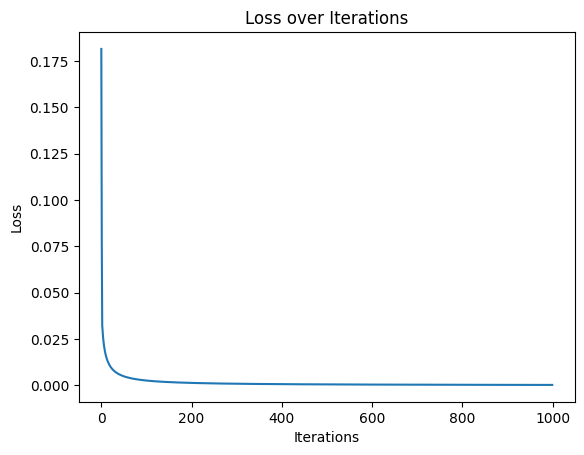

In [300]:
theta = np.zeros(X_train.shape[1])
theta, loss_history = gradient_descent(X_train, y_train, theta, learning_rate=0.001, epochs=1000)

import matplotlib.pyplot as plt
plt.plot(range(len(loss_history)), loss_history)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.show()

#from the graph below, it doesnt look like the value is c


In [301]:
# print(f"Optimized theta: {theta}")

# Extract intercept (first value)
intercept = theta[0]

# Extract remaining parameters
remaining_params = theta[1:]

# Print output nicely
print(f"Intercept: {intercept:.6f}")
print("Optimized theta (other coefficients):")
for i, value in enumerate(remaining_params, 1):
    print(f"theta_{i}: {value:.6f}")

Intercept: 5.458736
Optimized theta (other coefficients):
theta_1: -0.960536
theta_2: -1.221619
theta_3: 0.968144
theta_4: -0.813999
theta_5: -0.868605
theta_6: -0.669752
theta_7: 1.265424
theta_8: -0.082603
theta_9: -0.082603
theta_10: 0.343215
theta_11: 0.096112
theta_12: 0.000000
theta_13: 0.000000
theta_14: 0.000000
theta_15: -0.150128
theta_16: -0.082603
theta_17: -0.107290
theta_18: -0.148320
theta_19: 0.165320
theta_20: -0.145635
theta_21: -0.096023
theta_22: 0.045761
theta_23: -0.018445
theta_24: 3.283527
theta_25: 0.000000


# comparing to optimized values 


The coffeincets with l2 regularization
Coefficients: [[-0.48239918  0.25012896  0.13295103 -1.07011248 -1.85993836 -0.35693764
   0.58649552 -0.57615024 -0.57615024  0.3528903   0.24209653  1.74953891
   2.03812265  1.44893085  0.85087407 -0.57615024 -0.01533248 -0.22036193
   0.53371652  0.04373899  0.04428907  0.06665302  0.0248102   2.9046473
   0.06012161]]
Intercept: [0.10019821]

The coefficents when I remove l2 regularization.   
Coefficients: [[ -6.99528301   7.82836693   2.19555499 -11.7457175  -19.33905713
   -3.65095058   4.96833691  -7.92677486  -7.92677486   0.62853782
    7.11409796  19.77414107  23.03585506  16.37652233   5.64138601
   -7.92677486  -1.90422842  -4.6792676    5.33125211   0.37156814
    0.26034203  -0.30429412   0.41321156  19.56446439   0.67952375]]
Intercept: [0.67952375]

In [302]:
# Predictions
predictions = predict(X_test, theta)
accuracy = np.mean(predictions == y_test)

In [303]:
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


#### Using the Newton-Raphson Method


In [304]:
X

array([[ 1.        ,  0.28002015,  1.05642573, ..., -0.24279917,
         0.43781304,  0.        ],
       [ 1.        ,  0.28002015,  1.05642573, ..., -0.24279917,
         0.43781304,  0.        ],
       [ 1.        ,  0.28002015,  1.05642573, ..., -0.24279917,
         0.43781304,  0.        ],
       ...,
       [ 1.        , -1.21870124, -0.7532254 , ..., -0.24279917,
         0.43781304,  0.        ],
       [ 1.        , -1.21870124, -0.7532254 , ..., -0.24279917,
         0.43781304,  0.        ],
       [ 1.        , -1.21870124, -0.7532254 , ..., -0.24279917,
         0.43781304,  0.        ]])

In [305]:
#theta = np.zeros(X_train.shape[1])
theta = np.random.randn(X_train.shape[1]) * 0.01


In [306]:
#using NewtonRaphson method to optimize theta
def hessian(X, theta):
    """Compute the Hessian of the log-likelihood function."""
    predictions = sigmoid(np.dot(X, theta))
    S = np.diag(predictions * (1 - predictions))
    return X.T.dot(S).dot(X)


In [307]:
# def newton_raphson(X, y, theta, learning_rate=0.01, epochs=1000):
#     for _ in range(epochs):
#         gradient_value = gradient(X, y, theta)
#         hessian_value = hessian(X, theta)
#         theta += learning_rate * np.linalg.inv(hessian_value).dot(gradient_value)
#     return theta
def newton_raphson(X, y, theta, max_iters=10):
    """Optimize theta using the Newton-Raphson method."""
    for _ in range(max_iters):
        grad = gradient(X, y, theta)
        H = hessian(X, theta)
        theta += np.linalg.inv(H) @ grad  # Newton-Raphson update
    return theta


In [308]:
theta = newton_raphson(X_train, y_train, theta, max_iters=1000)

print(f"Optimized theta: {theta}")


LinAlgError: Singular matrix

In [ ]:
def hessian(X, theta):
    """Compute the Hessian matrix (second derivative of log-likelihood)."""
    predictions = sigmoid(np.dot(X, theta))
    diag = np.diag(predictions * (1 - predictions))  # Diagonal weight matrix
    return np.dot(X.T, np.dot(diag, X))  # X' * W * X